In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [1.0,2.0,3.0],
    [2.0,4.0,6.0]
]).T
data

array([[1., 2.],
       [2., 4.],
       [3., 6.]])

Epoch:0;w=[0.78492176];loss=19.761654019101606
Epoch:1;w=[1.10327226];loss=10.763066291579577
Epoch:2;w=[1.34000838];loss=2.0585488425125282
Epoch:3;w=[1.52137408];loss=0.23852850084742624
Epoch:4;w=[1.65290048];loss=0.12544572606431428
Epoch:5;w=[1.74453475];loss=0.30842387279914873
Epoch:6;w=[1.8147366];loss=0.035737740336802645
Epoch:7;w=[1.86564699];loss=0.01879501513873919
Epoch:8;w=[1.90111618];loss=0.04620987530046749
Epoch:9;w=[1.92702374];loss=0.07128169008299051
Epoch:10;w=[1.94628947];loss=0.01363336772602391
Epoch:11;w=[1.96036163];loss=0.02103034225292611
Epoch:12;w=[1.97074688];loss=0.011454049726002743
Epoch:13;w=[1.9784112];loss=0.006238379458968999
Epoch:14;w=[1.98411064];loss=0.0011931552279355292
Epoch:15;w=[1.98827365];loss=0.0018405183010251531
Epoch:16;w=[1.99136941];loss=0.0003520183482622093
Epoch:17;w=[1.9937411];loss=4.078912637277499e-05
Epoch:18;w=[1.99538093];loss=0.0002855775630997258
Epoch:19;w=[1.99665025];loss=1.1683493415257955e-05
predict (after train

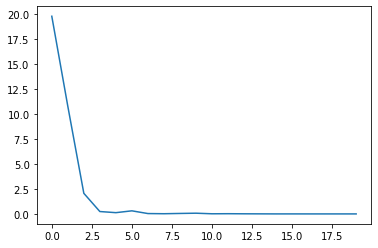

In [84]:
# 穷举法

class LinearModel:
    def __init__(self,eta = 0.01,batch_size=2):
        self.w = None
        self.eta = eta
        self.batch_size = batch_size
    
    def init_params(self,data):
        self.X,self.y = data[:,:-1],data[:,-1]
        self.n_samples,self.n_features = self.X.shape
        self.w = np.random.random(self.n_features)
        self.b = np.random.random(1).flatten()[0]
    
    def cost(self,x,y):
        y_pred = self.forward(x)
        return np.sum((y-y_pred)**2)
    
    def forward(self,x):
        return x.dot(self.w)
    
    def backward(self,):
        pass
    
    def gradient(self,x,y):
        return 2*(self.forward(x)-y).dot(x)
    
    def prediction(self,x):
        x = np.array(x)
        return self.forward(x)
    
    def fit(self,data):
        self.init_params(data)
        X,y = data[:,:-1].flatten(),data[:,-1]
        
        loss_list = []
        w_list = []
        for epoch in range(20):
            
            Xy = np.c_[X,y]
            np.random.shuffle(Xy)
            
            for i in range(0,self.n_samples,self.batch_size):
                xi,yi = Xy[i:i+self.batch_size,:-1],Xy[i:i+self.batch_size,-1]
                cost_val = self.cost(xi,yi)
                grad_val = self.gradient(xi,yi)
                self.w -= self.eta*grad_val
                
            w_list.append(self.w)
            loss_list.append(cost_val)
            print("Epoch:{};w={};loss={}".format(epoch,self.w,cost_val))
        print("predict (after training)",4,self.prediction(4)[0])
        self.plot(w_list,loss_list)
    
    def plot(self,w,loss):
        plt.plot(np.arange(0,len(w),1),loss)

lm = LinearModel()
lm.fit(data)

In [ ]:
# 梯度下降法
